In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *

In [3]:
# table = np.loadtxt('outputs/010_eyedea_all_aligned_RX100/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]
# table = np.loadtxt('outputs/010_eyedea_RX100/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]
# table = np.loadtxt('outputs/010_eyedea_RX100_1/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]
# table = np.loadtxt('outputs/010_eyedea_RX100_2/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]
# table = np.loadtxt('outputs/010_eyedea_RX100_half/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]
# table = np.loadtxt('outputs/010_eyedea_RX100_quarter/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]
table = np.loadtxt('outputs/004_heads_counts/tst_rvce_output.csv', delimiter=',', dtype=str)[1:-1]

In [4]:
def regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    y = y.reshape(-1, 1)
    a, b = np.linalg.inv(A.T @ A) @ A.T @ y
    return a, b

In [5]:
time = table[:, -2]
time = [int(t.split(': ')[1]) - int(t.split(': ')[0]) for t in time]
time = np.array(time)

n_events = table[:, 2].astype(int)

rvce = table[:, 1].astype(float)
mae = table[:, 0].astype(float)

window_length = 6

# n_events per window
density = n_events / time * window_length

In [8]:
n_events

array([294, 283, 118,  10,  17, 493, 335,  63, 250, 735, 832,  59,  47,
       232, 735,   8, 499, 355])

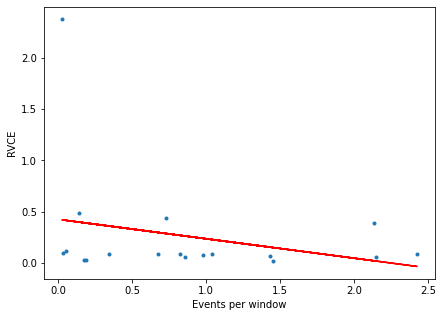

In [6]:
# perform linear regression
a, b = regression(density, rvce)

plt.figure(figsize=(7, 5))
plt.ylabel('RVCE')
plt.xlabel('Events per window')
plt.scatter(density, rvce, marker='.')
plt.plot(density, a * density + b, 'r')
plt.show()

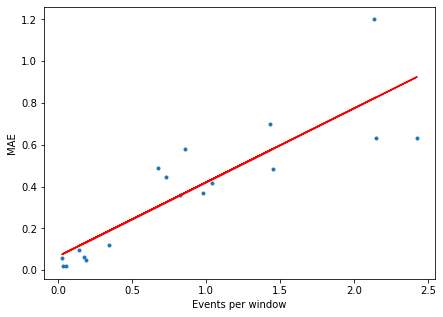

In [7]:
# perform linear regression
a, b = regression(density, mae)

plt.figure(figsize=(7, 5))
plt.ylabel('MAE')
plt.xlabel('Events per window')
plt.scatter(density, mae, marker='.')
plt.plot(density, a * density + b, 'r')
plt.show()